In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import mdtraj as md

In [24]:
traj_nums = [1,3,4,6,7,8,9,10]

In [59]:
trajs = {}
for i in traj_nums:
    print(i)
    df = pd.read_csv('data/'+str(i)+'_mw_disp_full.csv')
    pdb = md.load('data/{}.pdb'.format(i))
    xyz = df.values.reshape(-1, 1, 3)
    time = np.arange(xyz.shape[0])*0.1 # time in picoseconds
    traj = md.Trajectory(xyz=xyz, time = time, 
                         topology=pdb.topology, 
                         unitcell_angles=np.repeat(pdb.unitcell_angles, time.shape[0], axis=0), 
                         unitcell_lengths=np.repeat(pdb.unitcell_lengths, time.shape[0], axis=0))
    trajs[i]=traj

1
3
4
6
7
8
9
10


In [26]:
def plot_sample(ax, fig, traj, frac=0.01, plot_cbar=False):
    xyz = traj[::int(1/frac)].xyz
    t = traj[::int(1/frac)].time  
    c = ax.scatter(xs=xyz[:, 0, 0], ys = xyz[:, 0, 1], zs = xyz[:, 0, 2], c=t)
    if plot_cbar:
        fig.colorbar(c)
    return ax, fig

## Visualize all trajectories

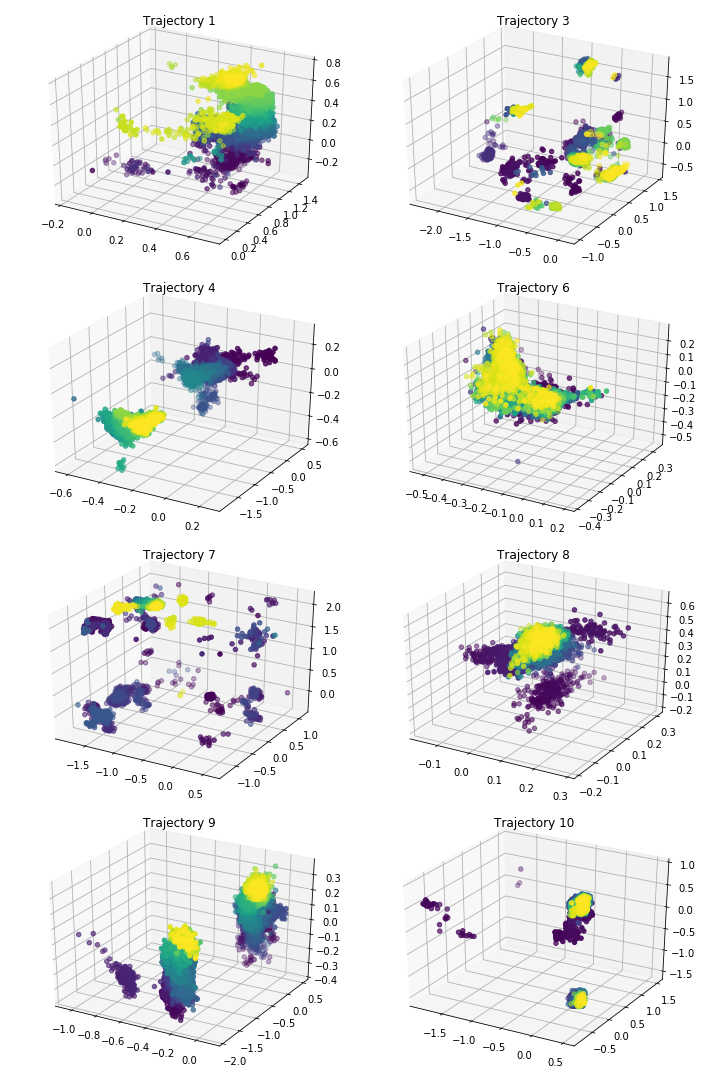

In [29]:
fig = plt.figure(figsize=(10,15))

for i, traj in enumerate(trajs.values()):
    ax = fig.add_subplot(4,2,i+1,projection='3d')

    plot_sample(ax, fig,traj, frac=0.001)
    ax.set_title('Trajectory {}'.format(traj_nums[i]))
plt.tight_layout()


## Attempt to undo PBCs

In [60]:
traj = trajs[4]


In [61]:
xyz = traj.xyz.reshape(-1, 3)
box_l = traj.unitcell_lengths
box_l.shape

(10000000, 3)

In [62]:
dxyz = xyz[1:,:]-xyz[:-1, :]
dxyz = np.concatenate(([[0, 0, 0]], dxyz), axis=0)


In [63]:
jumped = (np.abs(dxyz)>box_l)*1
new_xyz = xyz - jumped*np.sign(dxyz)*box_l

In [64]:
new_traj = md.Trajectory(xyz=new_xyz.reshape(-1, 1, 3), topology=traj.top)

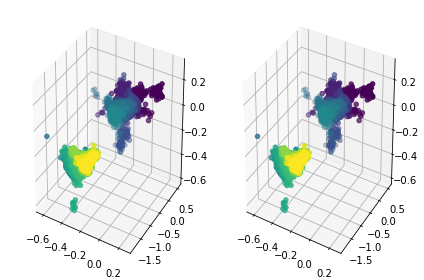

In [65]:
fig = plt.figure()
for i, trj in enumerate([traj, new_traj]):
    ax = fig.add_subplot(1,2,i+1,projection='3d')
    plot_sample(ax, fig,trj, frac=0.001)
    
plt.tight_layout()

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1,projection='3d')

plot_sample(ax, fig,traj, frac=0.001)
ax.set_title('Trajectory {}'.format(traj_nums[i]))
plt.tight_layout()


### With 0.1% of the data

In [ ]:
xyz = df.loc[df['traj']==6,:]

In [ ]:
xyz.shape

In [ ]:
xyz.loc[:,'t_ns'].iloc[1]

In [ ]:
dt = int(1000)
n_steps = int(xyz.shape[0]/dt)
fig = plt.figure(figsize=(10,15))

for i in range(n_steps):
    ax = fig.add_subplot(n_steps/2,2,i+1,projection='3d')
    plot_sample(ax, fig, xyz.iloc[i*dt:(i+1)*dt,:], frac=1)
    ax.set_title('{0:4.2f}ns - {1:4.2f}ns'.format(xyz.loc[:, 't_ns'].iloc[i*dt], 
                                                  xyz.loc[:, 't_ns'].iloc[(i+1)*dt-1]))



### With 1% of the data

In [ ]:
i = 6
df = pd.read_csv('data/'+str(i)+'_mw_disp_full.csv')
df.columns = ['x', 'y', 'z']
df['t_ns'] = np.arange(df.shape[0])*0.1/1000
df = df.iloc[::100, :] # keep only every 10 ps
df['traj'] = i


In [ ]:
xyz = df.loc[df['traj']==6,:]
dt = int(10000)
n_steps = int(xyz.shape[0]/dt)
fig = plt.figure(figsize=(10,15))

for i in range(n_steps):
    ax = fig.add_subplot(n_steps/2,2,i+1,projection='3d')
    plot_sample(ax, fig, xyz.iloc[i*dt:(i+1)*dt,:], frac=1)
    ax.set_title('{0:4.2f}ns - {1:4.2f}ns'.format(xyz.loc[:, 't_ns'].iloc[i*dt], 
                                              xyz.loc[:, 't_ns'].iloc[(i+1)*dt-1]))